# Aula 4 - Imagens Matriciais
## Representação

Também chamadas de **bitmaps**, as imagens matriciais são formas de representar imagens a partir de pixels.

Definições:
* **Pixel**: menor elemento que compõe uma imagem digital;
* **Bitmap**: **matriz de pixels** (tradução: mapa de bits);
* **Profundidade de bit**: quantidade de **bits por pixel** (bpp);
* **Resolução**: dimensões da imagem, normalmente expressa em **largura × altura**.
* **Canal Alpha**: É um canal de tons de cinza que define o nível de opacidade de uma cor

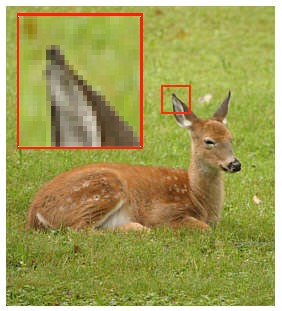

## Manipulação
* Ler imagem do disco e salvar em uma variável:

In [1]:
# PIL (Python Image Library) é utilizada para operações
# básicas em imagens:
from PIL import Image

In [2]:
img = Image.open('link.jpg')

* Exibir uma imagem:

In [3]:
# Matplotlib é utilizada para exibir imagens e gráficos:
import matplotlib.pyplot as plt

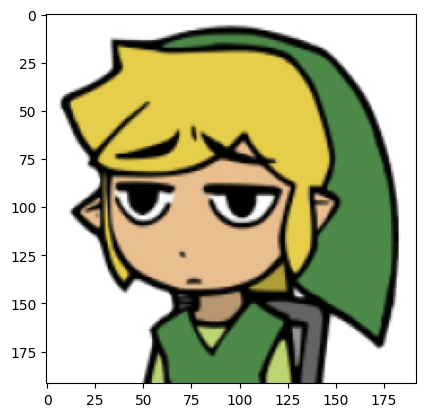

In [4]:
plt.imshow(img)

* Salvar uma imagem em um arquivo:

In [8]:
img.save('link.png')
type(img)

PIL.PngImagePlugin.PngImageFile

* Converter Image do PIL para Array do NumPy:

In [6]:
import numpy as np

(192, 192, 3)


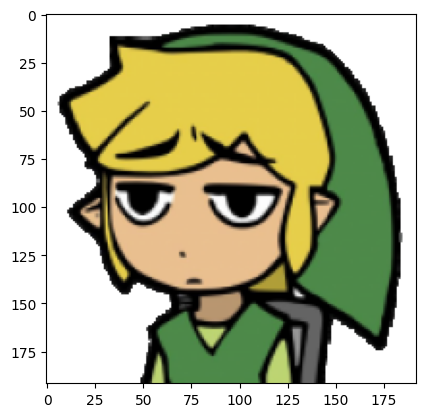

In [ ]:
img_np = np.array(img)
img_np2 = img_np[:,:,:3] #tirar o canal alfa
plt.imshow(img_np2)
print(img_np2.shape)

* Converter Array para Image:

In [8]:
img_pil = Image.fromarray(img_np)

#### Resumindo:
* Importar bibliotecas:
```python
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
```
* Ler/gravar/converter imagens:
```python
img = Image.open('imagem.extensao')
plt.imshow(img)
img_np = np.array(img)
img_pil = Image.fromarray(img_np)
img.save('imagem.extensao')
```

## RGB
* O espaço de cores RGB apresenta **três canais de cores (Red, Green, Blue) por pixel**, sendo uma cor representada como a combinação destes três canais.
* Adicionalmente, pode conter um canal A (alpha) representando transparência.
* Imagens RGB normalmente têm profundidade de **24 bpp**, isto é, **8 bits por canal**. Com isso, cada canal pode ter até 256 valores possíveis (0~255).
* Uma imagem com profundidade de 24 bpp ou mais é chamada de **truecolor**.
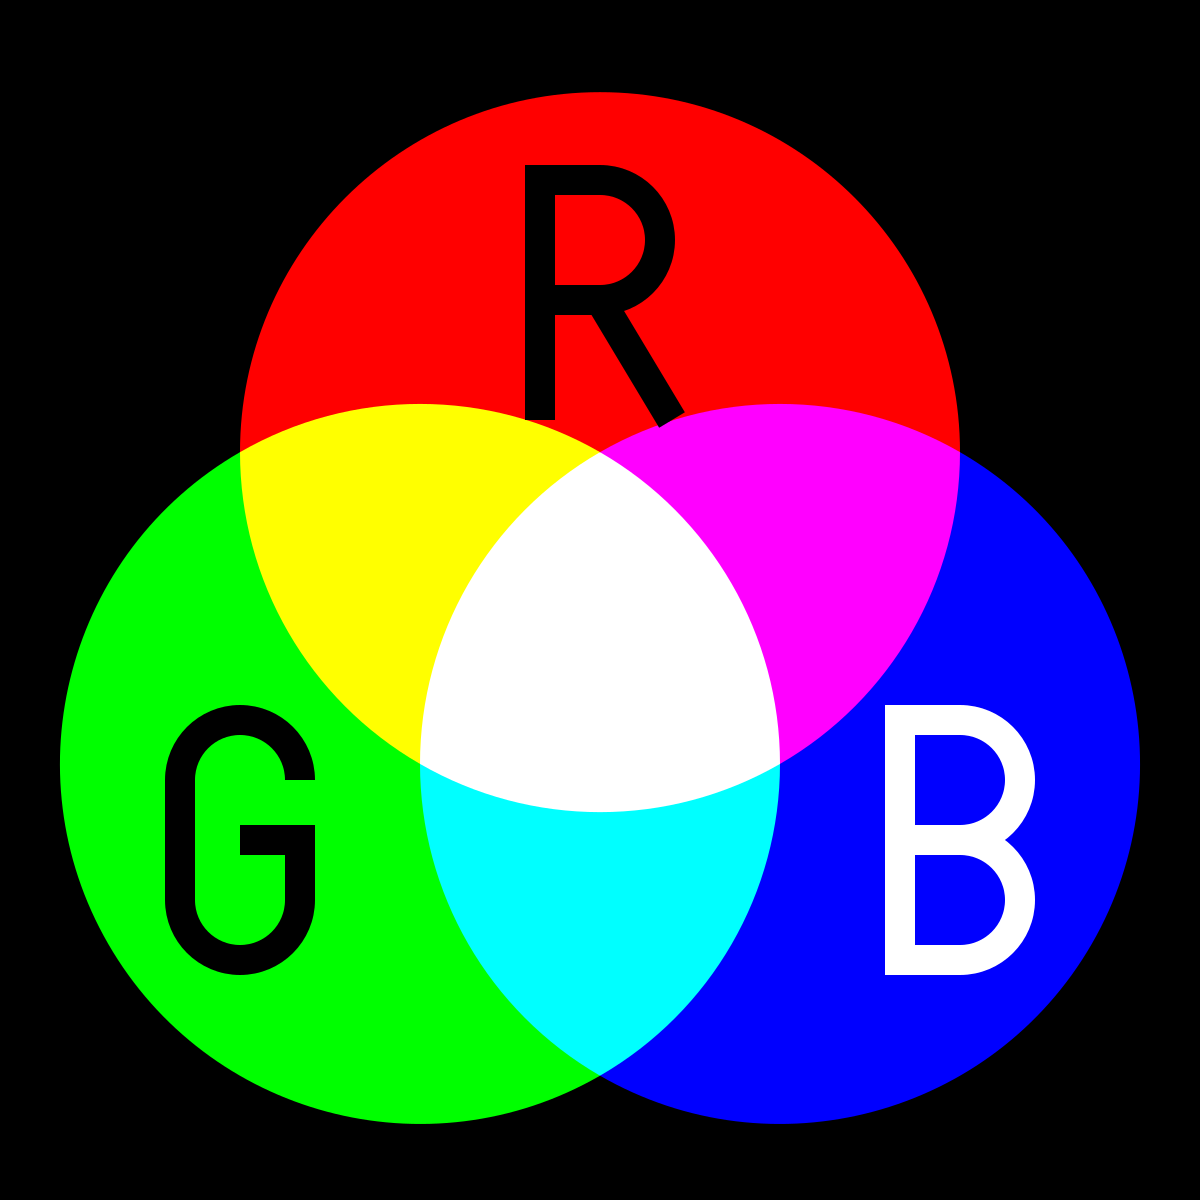

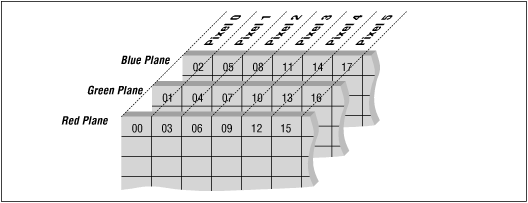

Algumas cores em RGB:
* Vermelho: (255, 0, 0);
* Verde: (0, 255, 0);
* Azul: (0, 0, 255);
* Branco: (255, 255, 255);
* Magenta: (255, 0, 255);
* Amarelo: (255, 255, 0);
* Ciano: (0, 255, 255);
* Preto: (0, 0, 0).

Exemplo com NumPy:

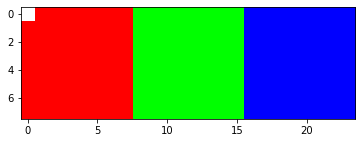

In [9]:
# Definindo um array com 8 linhas, 24 colunas, 3 canais (ou profundidade)
ex = np.zeros(shape=(8, 8 * 3, 3), dtype=np.uint8) # definir a forma (ou estrutura) de um array
ex[:, :8]   = (255, 0, 0) # todas as linhas, colunas 0:8
ex[:, 8:16] = (0, 255, 0) # todas as linhas, colunas 8:16
ex[:, 16:]  = (0, 0, 255) # todas as linhas, colunas 16:24
ex[0, 0] = (255, 255, 255) # linha 0, coluna 0, todas as páginas
plt.imshow(ex)

## Imagem binária (binary image)
* É uma imagem onde há somente dois valores possíveis;
* Normalmente preto e branco.
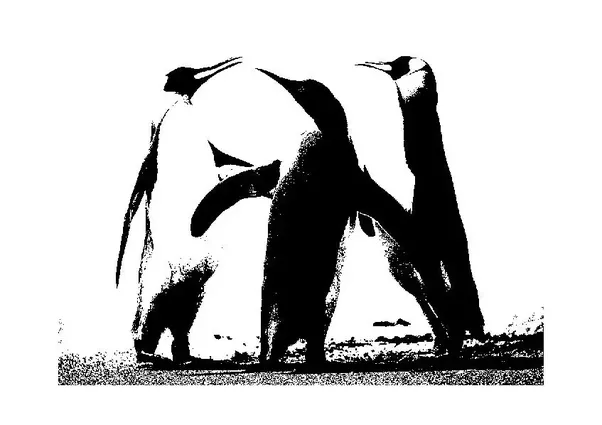

## Imagem em tons de cinza (grayscale image)
* É um bitmap com apenas um canal, representando a iluminação de cada pixel.
* Normalmente utiliza-se padrão de 4 bpp ou 8 bpp.
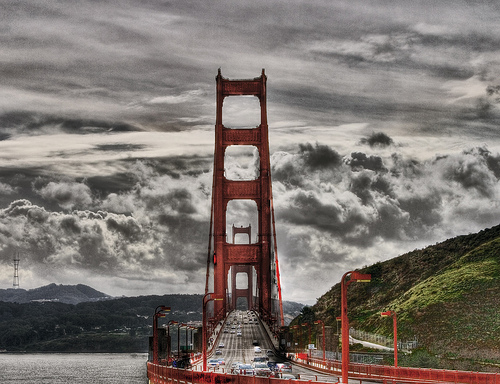 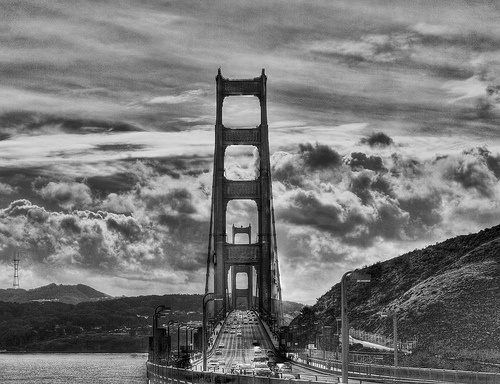

### Métodos de grayscale
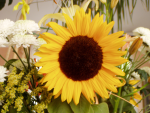
* **Lightness**: média das cores menos proeminentes com as mais proeminentes:
```python
(max(r, g, b) + min(r, g, b)) / 2
```
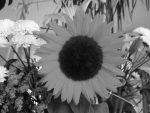
* **Average**: média aritmética simples:
```python
(r + g + b) / 3
```
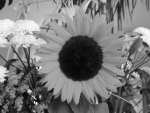
* **Luminosity**: média ponderada onde cada peso é dado de acordo com a percepção humana:

```python
0.2126 * r + 0.7152 * g + 0.0722 * b
```

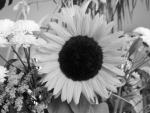

### Grayscale para imagem em tons de cinza

Método **Average** (iterativo):

(192, 192)


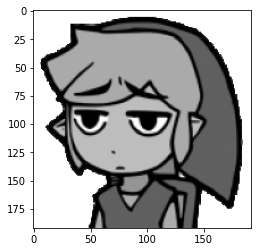

In [14]:
(l, c, p) = img_np.shape

img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img_np[i, j, 0])
        g = float(img_np[i, j, 1])
        b = float(img_np[i, j, 2])
        
        img_avg[i, j] = (r + g + b) / 3
        

plt.imshow(img_avg, cmap = 'gray')
print(img_avg.shape)

Método **Average** (NumPy, com `np.average`):

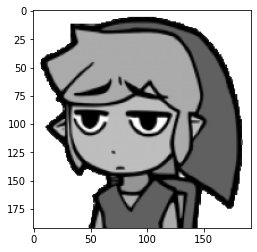

In [16]:
# Média no eixo 2 (páginas). Canal alpha (A) omitido.
# Obs.: Lembrar de converter para np.uint8!
img_avg2 = np.average(img_np[:, :, :3], axis=2)#.astype(np.uint8)
plt.imshow(img_avg2, cmap='gray')

Método **Average** (NumPy, com slices):

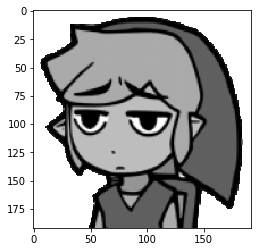

In [12]:
img_np_float64 = img_np[:, :, :3].astype(np.float64)
# Soma cada pixel das páginas 0, 1 e 2 e divide por 3.
# Obs.: Lembrar de converter para np.uint8!
img_avg3 = ((img_np_float64[:, :, 0] + img_np_float64[:, :, 1] + img_np_float64[:, :, 2]) / 3).astype(np.uint8)
plt.imshow(img_avg3, cmap='gray')

### Grayscale para imagem binária
Também chamada de **threshold** (limiar):
```
para cada pixel da imagem:
    se o valor em escala de cinza > limiar:
        setar como pixel branco
    senão:
        setar como pixel preto```

## Imagens monocromáticas
* Apresentam tons de apenas uma cor;
* Também é comum se referir às imagens em preto e branco e em tons de cinza como monocromáticas.

Para converter uma imagem RGB em:
1. <font color='red'>Vermelho</font>: zerar canais <font color='green'>G</font> e <font color='blue'>B</font> e usar um método de grayscale em <font color='red'>R</font>;
2. <font color='green'>Verde</font>: zerar canais <font color='red'>R</font> e <font color='blue'>B</font> e usar um método de grayscale em <font color='green'>G</font>;
3. <font color='blue'>Azul</font>: zerar canais <font color='red'>R</font> e <font color='green'>G</font> e usar um método de grayscale em <font color='blue'>B</font>.

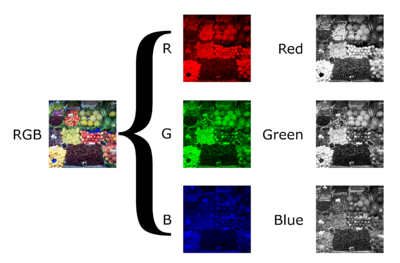

Para gerar imagens monocromáticas a partir de outras:
1. Pegar valor da cor em RGB;
2. Gerar imagens monocromáticas de <font color='red'>vermelho</font>, <font color='green'>verde</font> e <font color='blue'>azul</font>;
3. Misturar (blend) as imagens resultantes usando pesos proporcionais à presença de cada cor.

Exemplo (<font color='purple'>roxo</font>):
1. (<font color='red'>127</font>, <font color='green'>0</font>, <font color='blue'>127</font>);
2. Gerar <font color='red'>img_vermelho</font> e <font color='blue'>img_azul</font>;
3. <font color='purple'>img_roxo</font> = 0.5 * <font color='red'>img_vermelho</font> + 0.5 * <font color='blue'>img_azul</font>.

## Exercícios
Dica para os exercícios: lembre-se de converter para os tipos apropriados (`np.float64`, `np.uint8`) onde for necessário!

1. Utilize um método grayscale e salve a imagem resultante no disco.

2. Converta uma imagem para binária, utilizando um método de grayscale diferente do anterior. Salve-a no disco.

3. Converta uma imagem para algum espectro monocromático utilizando um método de grayscale diferente dos anteriores. Exiba-a com o matplotlib.

Dica: Caso necessário, uma cópia de uma imagem `img` pode ser feita com `img.copy()`.